In [1]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.7 MB/s eta 0:00:00


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
# Create a quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Apply CNOT gate (control: qubit 0, target: qubit 1)
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Initialize the Aer simulator
simulator = AerSimulator()

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation and get results
result = simulator.run(compiled_circuit, shots=1000).result()

# Get the counts of measurement outcomes
counts = result.get_counts(qc)

# Print the results
print("Measurement outcomes:", counts)

# Plot the histogram of results
plot_histogram(counts)
plt.show()

Measurement outcomes: {'00': 490, '11': 510}


In [6]:
print(counts)

{'00': 490, '11': 510}


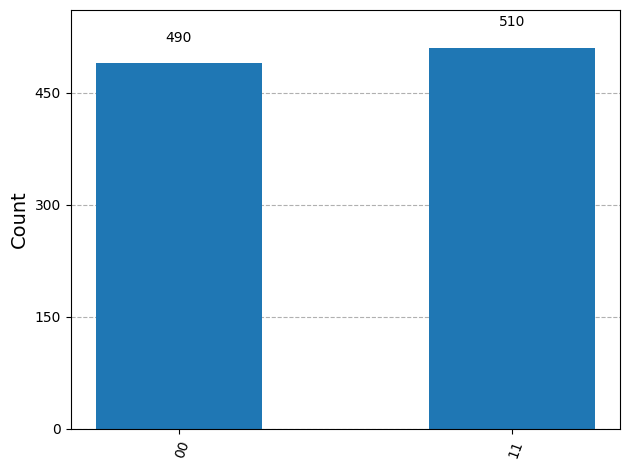

In [7]:
from qiskit.visualization import plot_histogram

# Directly display in Colab
plot_histogram(counts)

In [11]:
qc.draw("text")

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1